In [1]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
with open(r"C:\Users\richa\Desktop\Univecity projects\MDM3 B\mojo_sperm_tracking_data_bristol\tp49\cover0_0_YOLO_NO_TRACKING_output\centroids_with_meta.json", "r") as read_file:
    data = json.load(read_file)

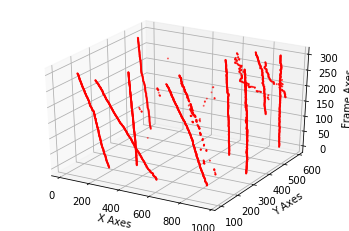

In [2]:
x_values = []
y_values = []
frame_values=[]
#Plotting all positions of center of sperm heads for video 0
for i in range(0,len(data["centroids"])): # number of frames
    for j in range(0,len(data["centroids"][i])): #number of sperms in frame
        x_values.append(data["centroids"][i][j]["center"][0])
        y_values.append(data["centroids"][i][j]["center"][1])
        frame_values.append(i)

#2D  - Various positions of all sperm heads for all frames
#plt.scatter(x_values,y_values,s=1)

#3D - adding frame dimension (can be converted to time with FPS value)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(x_values,y_values,frame_values,color='r',s=1)
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Frame Axes')

plt.show()

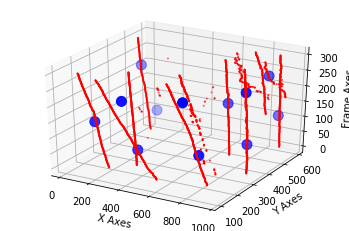

In [4]:
# Author: Richard

from sklearn.cluster import KMeans
import numpy as np
X = []
for i in range(0,len(x_values)):
    X.append([x_values[i],y_values[i],frame_values[i]])


X = np.asarray(X)



kmeans = KMeans(n_clusters=12, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2],color='r',s=1)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='b')
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Frame Axes')
plt.show()